In [1]:
import requests
import requests.auth
import praw
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
USERNAME = 'mycoalring'
PASSWORD = 'Kan4Kan4Zhe4Ge!'
CLIENT_ID = 'OlAk1-JhpsqidA'
CLIENT_SECRET = 'FAxziWfQW5VVbgNDy1lco0758L9kxA'

# Now that we have creds, we can use the praw library to look at some stuff

In [5]:
reddit = praw.Reddit(
user_agent="Comment Extraction (by u/mycoalring)",
client_id=CLIENT_ID,
client_secret=CLIENT_SECRET,
username=USERNAME,
password=PASSWORD)

See if we can grab stuff from "https://www.reddit.com/r/funny/comments/3g1jfi/buttons/"

In [18]:
submission = reddit.submission(id='3g1jfi')

In [19]:
for top_level_comment in submission.comments:
    print(top_level_comment.body)

[deleted]
[Trusted] Download

[Fast] Download 

ALWAYS NEITHER OF THESE 
"i must have chosen correct cause i got a congratulation saying i was the millionth person to download the file and to click here to claim my free ipad" 
It is said that he who holds the Sacred Chalice of Ad-block shall find the One Button.
If you need help, just use the Ask toolbar!
This really bothers me.

In Indiana Jones and the Last Crusade the dude didn't get his face melted off after choosing poorly, he just started aging really fast until he shriveled up into dust.

Raiders is where dudes' faces melted off.
The one with the magnet.
http://i.imgur.com/vpM80kV.png
How about hovering your mouse over all of them to see where they lead you to? No? Noone does that?
It's fucking infuriating! I have gotten a lot better at recognizing the bullshit though.
unless it's one of those pages where the first click, no matter where on the page, will always open a new tab of ad. After that, the 2nd click will work... assumi

AttributeError: 'MoreComments' object has no attribute 'body'

# Let's get stuff from the TSLA investor's club :D 

In [6]:
tsla_investor_club_subreddit = reddit.subreddit("teslainvestorsclub")

In [7]:
hot_submissions = []
# hot() will return Submission objects
for comment in tsla_investor_club_subreddit.hot():
    hot_submissions.append(comment)

In [9]:
hot_submissions[0:10]

[Submission(id='kdhrh4'),
 Submission(id='kctona'),
 Submission(id='kdw51c'),
 Submission(id='kdn6vg'),
 Submission(id='kdyq6v'),
 Submission(id='kduy9u'),
 Submission(id='kdwnp3'),
 Submission(id='kdvfu5'),
 Submission(id='kdj21n'),
 Submission(id='ke26fp')]

In [10]:
hot_submissions_titles = []
for submission in hot_submissions:
    hot_submissions_titles.append(submission.title)

In [11]:
hot_submissions_titles[0:10]

['$TSLA Daily Investor Discussion - December 15, 2020',
 '$TSLA Weekly Detailed Discussion - December 14, 2020',
 'Tesla is giving a year of free supercharging to new Model 3 and Y buyers',
 'Tesla Stock one of the major trends of the year. Cross post from r/Dataisbeautiful',
 'To Cut Emissions to Zero, U.S. Needs to Make Big Changes in Next 10 Years',
 'Tesla is upgrading Model 3 and Model Y headlights',
 "Tesla stock's S&P 500 entry to drive tsunami of trading volume",
 "Use Yahoo finance a lot and found this gem today. Wanted to share and get some thoughts. “Tesla is a 'prime' candidate to see its stock plummet after it enters S&P 500, analyst says”",
 'Historic stock market volume is likely this week as Tesla goes into the S&P 500',
 'December 15 25D IV skew is perfectly balanced now (signaling more neutral sentiment v.s. previously more bullish)']

# Let's dissect a single submission

In [30]:
submission = reddit.submission(id='kctolb')
submission_comments = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, praw.models.MoreComments):
        continue
    submission_comments.append(top_level_comment.body)
    print(top_level_comment.body)

Alright guys, im retiring. I've given over 120 awards to Automod, and probably another hundred or so to those who have commented. Good luck this week all. Have fun.
Whoever is giving out awards, can you purchase more Tesla shares instead so that we can moon today? Pleaseeeee🚀🚀
Ready for the craziest week in TSLA stock history 🚀
IN MEMORIAM

Before this slingshot maneuver officially begins, I feel it is only right to lay a few former members to rest. I am not one to desecrate a corpse or advocate for it, so if you feel so moved after this brief homily, please press F to pay respects or leave a memory of one of the fallen that taught you how to forge your hands of stronger materials, or just one that made you laugh.

In addition, please add other names - I am not intentionally leaving anybody out. I will try to edit the post with your dedications.

For /u/soooohatemods - one of the OG deserters. Showed the rest of these how to do it. RIP.

For /u/pencil_dick69 - your pencil sized 1.8 sha

In [36]:
text = ' '.join(submission_comments)

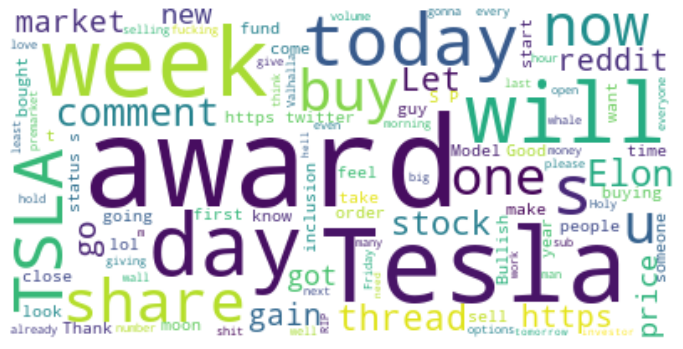

In [38]:
wordcloud = WordCloud(max_font_size=75, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Get the top 10 Reddit posts hyperlinks to send in report 

In [13]:
hot_submissions = []
# hot() will return Submission objects
for comment in tsla_investor_club_subreddit.hot(limit=10):
    hot_submissions.append(comment)

In [15]:
hot_submissions_titles = []
for submission in hot_submissions:
    hot_submissions_titles.append(submission.title)
hot_submissions_titles

['$TSLA Daily Investor Discussion - December 21, 2020',
 '$TSLA Weekly Detailed Discussion - December 21, 2020',
 'Elon Musk on Twitter: `Thanks to everyone who worked so hard to make Tesla successful. My heart goes out to you.`',
 'Tesla Opens As 6th Largest Company In S&P 500',
 'Tesla enters the S&P 500 with 1.69% weighting in the benchmark, fifth largest',
 'Exclusive: A $5 billion foundation literally founded on oil money is saying goodbye to fossil fuels',
 "Tesla's ex doing 1 hour of autonomy in Munich.",
 'Tesla Supercharger network is already being made accessible to other EVs | Teslarati',
 'New MobileEye tech presentation from today. Shows a lot of camera/lidar/CV tech much like you see in FSD tech talks etc.',
 'Elon Musk on Twitter - “Absolutely. We will release FSD subscription early next year.”']

In [16]:
hot_submissions[0].url

'https://www.reddit.com/r/teslainvestorsclub/comments/khd4wd/tsla_daily_investor_discussion_december_21_2020/'

In [17]:
%%html
<a href=f"{hot_submissions[0].url}">Link</a>